# Purpose

When plotting subplots in Matplotlib, sometimes, the last subplot should be turned off. For example, imagine you have 5 subplots and you create a 3 rows by 2 columns subplots. The first five subplots should show, but the last one should not. 

This notebook synthesizes 5 variables for which we want to plot the corresponding univariate distributions onto a 3 x 2 subplots. Since the last subplots is not needed to be displayed, we turn it off.

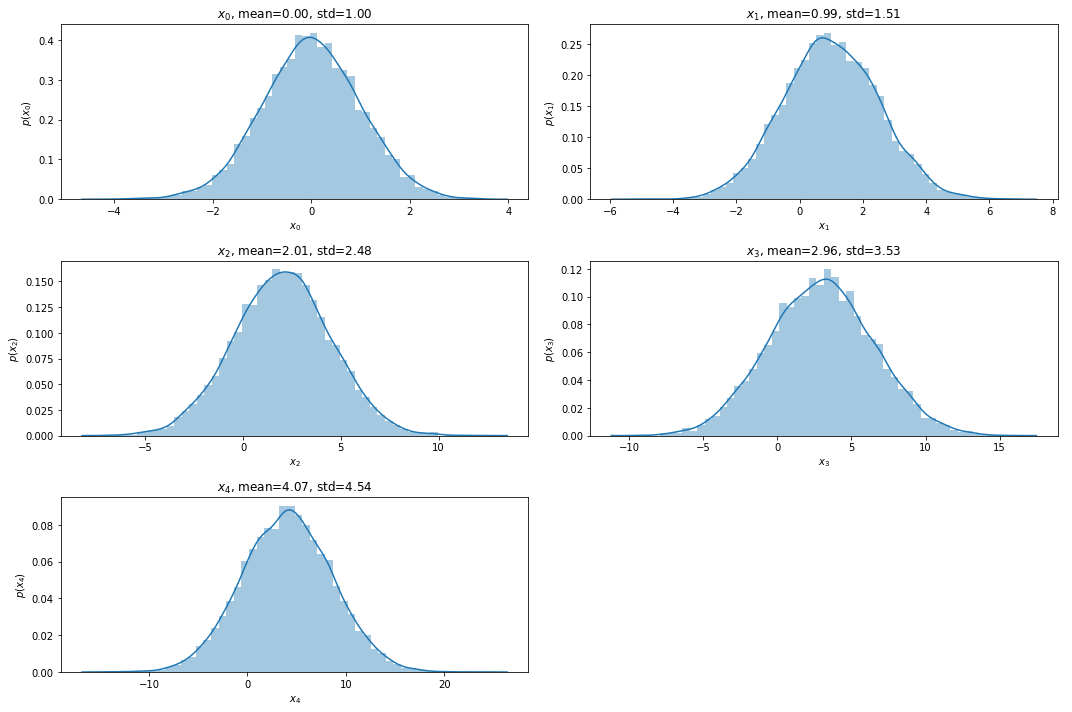

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

np.random.seed(37)

# simulate data
N = 10000

X = np.concatenate([
    np.random.normal(0, 1.0, N).reshape(-1, 1), 
    np.random.normal(1, 1.5, N).reshape(-1, 1), 
    np.random.normal(2, 2.5, N).reshape(-1, 1), 
    np.random.normal(3, 3.5, N).reshape(-1, 1),
    np.random.normal(4, 4.5, N).reshape(-1, 1)], axis=1)

n_cols = 2
n_rows = math.ceil(X.shape[1] / n_cols)
is_even = True if X.shape[1] / n_cols == 0 else False

# plot data
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10))
ax = np.ravel(ax)

for i, a in zip(range(X.shape[1]), ax):
    label = 'x_{}'.format(i)
    x = X[:, i]
    
    sns.distplot(x, ax=a)
    mu = np.mean(x)
    std = np.std(x)
    
    a.set_title(r'${}$, mean={:.2f}, std={:.2f}'.format(label, mu, std))
    a.set_xlabel(r'${}$'.format(label))
    a.set_ylabel(r'$p({})$'.format(label))

if is_even is False:
    ax[-1].axis('off')
    
plt.tight_layout()